In [2]:
import numpy as np
from sklearn import datasets

from sklearn.decomposition import PCA
from Tesi.resurces.FDA import FDA, KPCA_FDA

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer

from collections import Counter

from imblearn.over_sampling import RandomOverSampler

In [3]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=100, resize=0.9)
face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

In [4]:
n_components_pca = face_data.shape[0] - face_tnames.shape[0]
pca = PCA(n_components= n_components_pca)
pca_data = pca.fit_transform(face_data)


n_components_fda = face_tnames.shape[0]-1
fda = FDA(n_components_fda)
fda.fit(pca_data, face_targets)
fda_data = fda.transform(pca_data)

In [10]:
e1 = np.zeros(n_components_pca)
e1[0] = 1
eigenface = pca.inverse_transform(e1)
print(eigenface.shape)

(9408,)


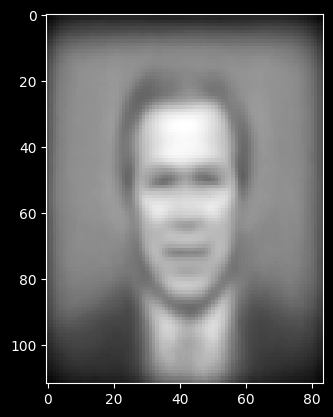

In [13]:
_, height, width = face_images.shape
eigenface = eigenface.reshape((height, width))
plt.imshow(eigenface, cmap=plt.cm.gray)
plt.show()

In [54]:
e1 = np.zeros(n_components_fda)
e1[0] = 1
m_class_t = np.matmul(fda.m_class, fda.w)
e1 = m_class_t[3]
f1 = np.matmul(fda.w, e1)
fischerface = pca.inverse_transform(f1)
print(fischerface.shape)

1.1979829875902288
(9408,)


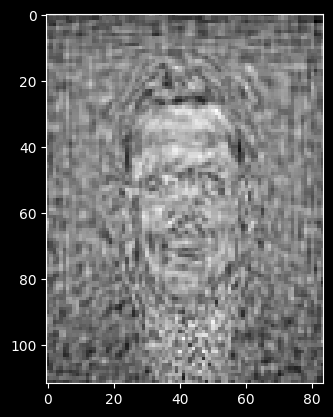

In [55]:
fischerface = fischerface.reshape((height, width))
plt.imshow(fischerface, cmap=plt.cm.gray)
plt.show()

In [62]:
e1 = np.zeros(n_components_fda)
e1[0] = 1
f1 = np.matmul(fda.w, e1)
for i in range(fda.w.shape[1]):
    for j in range(i, fda.w.shape[1]):
        print(np.dot(fda.w[:,i], fda.w[:,j]))

0.9999999999999993
-0.12031033597883763
-0.10501401331981396
-0.18623001800137723
0.9999999999999992
0.24469693494448636
-0.18022499163872183
0.9999999999999997
-0.014358516789437498
0.9999999999999997


(9408,)


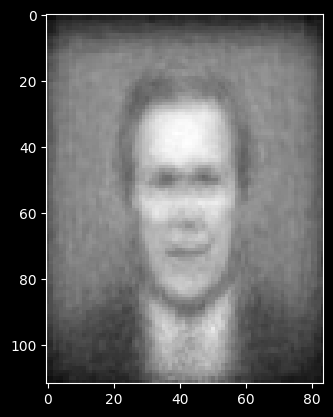

In [80]:
w_i =np.linalg.pinv(fda.w)
f1 = np.matmul(m_class_t[1], w_i)*2
fischerface = pca.inverse_transform(f1)
print(fischerface.shape)
fischerface = fischerface.reshape((height, width))
plt.imshow(fischerface, cmap=plt.cm.gray)
plt.show()